# Productivity and Engagement Insights Using Python

### Importing necessary libraries

In [1]:
import pandas as pd

### Importing the data

In [4]:
data = pd.read_csv('Employee_Data.csv')
print(data)

      work_year                 job_title                    job_category  \
0          2023      Data DevOps Engineer                Data Engineering   
1          2023            Data Architect  Data Architecture and Modeling   
2          2023            Data Architect  Data Architecture and Modeling   
3          2023            Data Scientist       Data Science and Research   
4          2023            Data Scientist       Data Science and Research   
...         ...                       ...                             ...   
9350       2021           Data Specialist    Data Management and Strategy   
9351       2020            Data Scientist       Data Science and Research   
9352       2021  Principal Data Scientist       Data Science and Research   
9353       2020            Data Scientist       Data Science and Research   
9354       2020     Business Data Analyst                   Data Analysis   

     salary_currency  salary employee_residence experience_level  \
0      

### Productivity by Experience Level

In [6]:
# Group by experience_level and calculate average salary as a proxy for productivity
productivity_by_experience = data.groupby('experience_level').agg(
    avg_salary=('salary', 'mean'),
    employee_count=('job_title', 'count')
).sort_values('avg_salary', ascending=False)

print(productivity_by_experience)


                     avg_salary  employee_count
experience_level                               
Executive         188128.943060             281
Senior            162260.680578            6709
Mid-level         115987.527555            1869
Entry-level        89363.784274             496


### Productivity by Experience Level

In [7]:
# Group by job_category and calculate average salary and employee count
engagement_by_category = data.groupby('job_category').agg(
    avg_salary=('salary', 'mean'),
    employee_count=('job_title', 'count')
).sort_values('avg_salary', ascending=False)

print(engagement_by_category)


                                   avg_salary  employee_count
job_category                                                 
Machine Learning and AI         179338.905462            1428
Data Science and Research       163401.934970            3014
Data Architecture and Modeling  155343.891892             259
Cloud and Database              155000.000000               5
Data Engineering                145588.369469            2260
Leadership and Management       144164.409543             503
BI and Visualization            135935.840256             313
Data Analysis                   107801.471517            1457
Data Management and Strategy    103085.950820              61
Data Quality and Operations     100554.363636              55


### Geographical Influence on Productivity

In [9]:
# Group by employee_residence and calculate average salary
productivity_by_residence = data.groupby('employee_residence').agg(
    avg_salary=('salary', 'mean')
).sort_values('avg_salary', ascending=False)

print(productivity_by_residence)


                       avg_salary
employee_residence               
Qatar               300000.000000
Malaysia            200000.000000
Denmark             200000.000000
Puerto Rico         166000.000000
United States       158586.128741
...                           ...
Serbia               21600.000000
Costa Rica           20000.000000
Honduras             20000.000000
Ecuador              16000.000000
Indonesia            15000.000000

[83 rows x 1 columns]


### Tenure and Engagement Trends

In [11]:
# Add a tenure column
data['tenure'] = 2024 - data['work_year']

# Group by tenure and calculate average salary
engagement_by_tenure = data.groupby('tenure').agg(
    avg_salary=('salary', 'mean'),
    employee_count=('job_title', 'count')
).sort_values('tenure', ascending=True)

print(engagement_by_tenure)


           avg_salary  employee_count
tenure                               
1       154695.679995            7453
2       134957.181151            1634
3       109297.050761             197
4       106729.704225              71


# Retention Strategy Recommendations using python

### Preprocessing Data for Attrition Modeling

In [14]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load data (assuming 'attrition' column exists, with 1 for attrition and 0 for retention)
data['attrition'] = data.get('attrition', 0)  # Placeholder for attrition column if not present

# Encoding categorical variables
label_encoders = {}
categorical_columns = ['job_title', 'job_category', 'salary_currency', 'employee_residence', 
                        'experience_level', 'employment_type', 'work_setting', 'company_location', 'company_size']

for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Splitting the data into features and target
X = data.drop(columns=['attrition'])
y = data['attrition']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#### Build A Model to Predict Attrition

In [15]:
# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[2807]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2807

    accuracy                           1.00      2807
   macro avg       1.00      1.00      1.00      2807
weighted avg       1.00      1.00      1.00      2807



In [16]:
#### Feature Importance Analysis

### Feature Importance Analysis

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


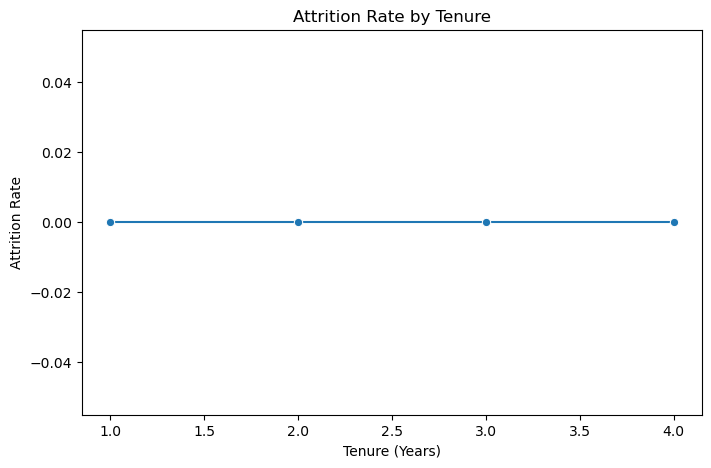

In [22]:
# Analyze attrition by tenure
import matplotlib.pyplot as plt
import seaborn as sns
tenure_attrition = data.groupby('tenure').agg(
    attrition_rate=('attrition', 'mean'),
    employee_count=('attrition', 'count')
).reset_index()

# Plot tenure vs. attrition rate
plt.figure(figsize=(8, 5))
sns.lineplot(data=tenure_attrition, x='tenure', y='attrition_rate', marker='o')
plt.title('Attrition Rate by Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Attrition Rate')
plt.show()
